In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import missingno as msno

# Suppress warnings
warnings.filterwarnings('ignore')

# If you're using Jupyter Notebook, uncomment the next line:
# %matplotlib inline

# If you're using a script, use plt.show() after your plots instead


ModuleNotFoundError: No module named 'missingno'

In [4]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install missingno


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import missingno as msno  # Make sure this package is installed

warnings.filterwarnings('ignore')

# You can visualize missing data like this:
# msno.matrix(df)   # Assuming df is your DataFrame
# plt.show()        # Required if you're not using Jupyter


In [7]:
nba = pd.read_csv(r"C:\Users\sakin_fmek02v\Downloads\shot_logs.csv.zip")
df = nba.copy()
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [8]:
df.columns = df.columns.str.lower()

In [9]:
df.shape

(128069, 21)

In [10]:
df.isnull().sum()

game_id                          0
matchup                          0
location                         0
w                                0
final_margin                     0
shot_number                      0
period                           0
game_clock                       0
shot_clock                    5567
dribbles                         0
touch_time                       0
shot_dist                        0
pts_type                         0
shot_result                      0
closest_defender                 0
closest_defender_player_id       0
close_def_dist                   0
fgm                              0
pts                              0
player_name                      0
player_id                        0
dtype: int64

In [11]:
# Take a quick look shot_clock column which has nan value
df[df.shot_clock.isnull()==True].head()

,game_id,matchup,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,...,shot_dist,pts_type,shot_result,closest_defender,closest_defender_player_id,close_def_dist,fgm,pts,player_name,player_id
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
24,21400845,"FEB 25, 2015 - CHA @ CHI",A,W,12,6,2,0:04,NaN,0,...,25.2,3,missed,"Butler, Jimmy",202710,3.6,0,0,brian roberts,203148
54,21400768,"FEB 08, 2015 - CHA vs. IND",H,L,-1,14,4,0:01,NaN,5,...,34.4,3,missed,"Hill, George",201588,3.6,0,0,brian roberts,203148
76,21400742,"FEB 05, 2015 - CHA vs. WAS",H,W,7,10,3,0:01,NaN,2,...,13.1,2,made,"Butler, Rasual",2446,2.5,1,2,brian roberts,203148
129,21400611,"JAN 19, 2015 - CHA vs. MIN",H,W,25,7,2,0:02,NaN,5,...,12.0,2,missed,"Williams, Mo",2590,4.0,0,0,brian roberts,203148


In [12]:
new_df = df.drop(columns=["matchup",
                          "final_margin",
                          "shot_number",
                          "closest_defender",
                          "closest_defender_player_id",
                          "fgm",
                          "pts",
                          "player_id"], axis=1)

In [13]:
new_df.describe()

,game_id,period,shot_clock,dribbles,touch_time,shot_dist,pts_type,close_def_dist
count,1.280690e+05,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,4.123015
std,2.578773e+02,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,2.756446
min,2.140000e+07,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,0.000000
25%,2.140023e+07,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,2.300000
50%,2.140045e+07,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,3.700000
75%,2.140067e+07,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,5.300000
max,2.140091e+07,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,53.200000


In [14]:
len(new_df.touch_time[new_df.touch_time<0])

312

In [15]:
new_df.touch_time[new_df.touch_time<0] = new_df.touch_time.mean()

In [16]:
new_df.isnull().sum()

game_id              0
location             0
w                    0
period               0
game_clock           0
shot_clock        5567
dribbles             0
touch_time           0
shot_dist            0
pts_type             0
shot_result          0
close_def_dist       0
player_name          0
dtype: int64

In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   game_id         128069 non-null  int64  
 1   location        128069 non-null  object 
 2   w               128069 non-null  object 
 3   period          128069 non-null  int64  
 4   game_clock      128069 non-null  object 
 5   shot_clock      122502 non-null  float64
 6   dribbles        128069 non-null  int64  
 7   touch_time      128069 non-null  float64
 8   shot_dist       128069 non-null  float64
 9   pts_type        128069 non-null  int64  
 10  shot_result     128069 non-null  object 
 11  close_def_dist  128069 non-null  float64
 12  player_name     128069 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 12.7+ MB


In [18]:
# converting to nominal value from the categorical values to add to some calculating
new_df.location = new_df.location.map({"H":1,"A":0})
new_df.w = new_df.w.map({"W":1,"L":0})
new_df.pts_type = new_df.pts_type.map({2:0,3:1})
new_df.shot_result = new_df.shot_result.map({"made":1,"missed":0})

In [19]:
new_df = new_df.rename(columns={"location":"home_away","pts_type":"3pts_shot","shot_result":"hit"})

In [20]:
# the unique values in dataframe. There are 904 games and 281 players in dataframe.
new_df.nunique()

game_id           904
home_away           2
w                   2
period              7
game_clock        719
shot_clock        241
dribbles           33
touch_time        242
shot_dist         448
3pts_shot           2
hit                 2
close_def_dist    299
player_name       281
dtype: int64

In [21]:
new_df.head()

,game_id,home_away,w,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,3pts_shot,hit,close_def_dist,player_name
0,21400899,0,1,1,1:09,10.8,2,1.9,7.7,0,1,1.3,brian roberts
1,21400899,0,1,1,0:14,3.4,0,0.8,28.2,1,0,6.1,brian roberts
2,21400899,0,1,1,0:00,NaN,3,2.7,10.1,0,0,0.9,brian roberts
3,21400899,0,1,2,11:47,10.3,2,1.9,17.2,0,0,3.4,brian roberts
4,21400899,0,1,2,10:34,10.9,2,2.7,3.7,0,0,1.1,brian roberts


In [22]:
new_df.describe()

,game_id,home_away,w,period,shot_clock,dribbles,touch_time,shot_dist,3pts_shot,hit,close_def_dist
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.499215,0.504377,2.469427,12.453344,2.023355,2.778696,13.571504,0.264670,0.452139,4.123015
std,2.578773e+02,0.500001,0.499983,1.139919,5.763265,3.477760,2.983555,8.888964,0.441159,0.497706,2.756446
min,2.140000e+07,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.140023e+07,0.000000,0.000000,1.000000,8.200000,0.000000,0.900000,4.700000,0.000000,0.000000,2.300000
50%,2.140045e+07,0.000000,1.000000,2.000000,12.300000,1.000000,1.600000,13.700000,0.000000,0.000000,3.700000
75%,2.140067e+07,1.000000,1.000000,3.000000,16.675000,2.000000,3.700000,22.500000,1.000000,1.000000,5.300000
max,2.140091e+07,1.000000,1.000000,7.000000,24.000000,32.000000,24.900000,47.200000,1.000000,1.000000,53.200000


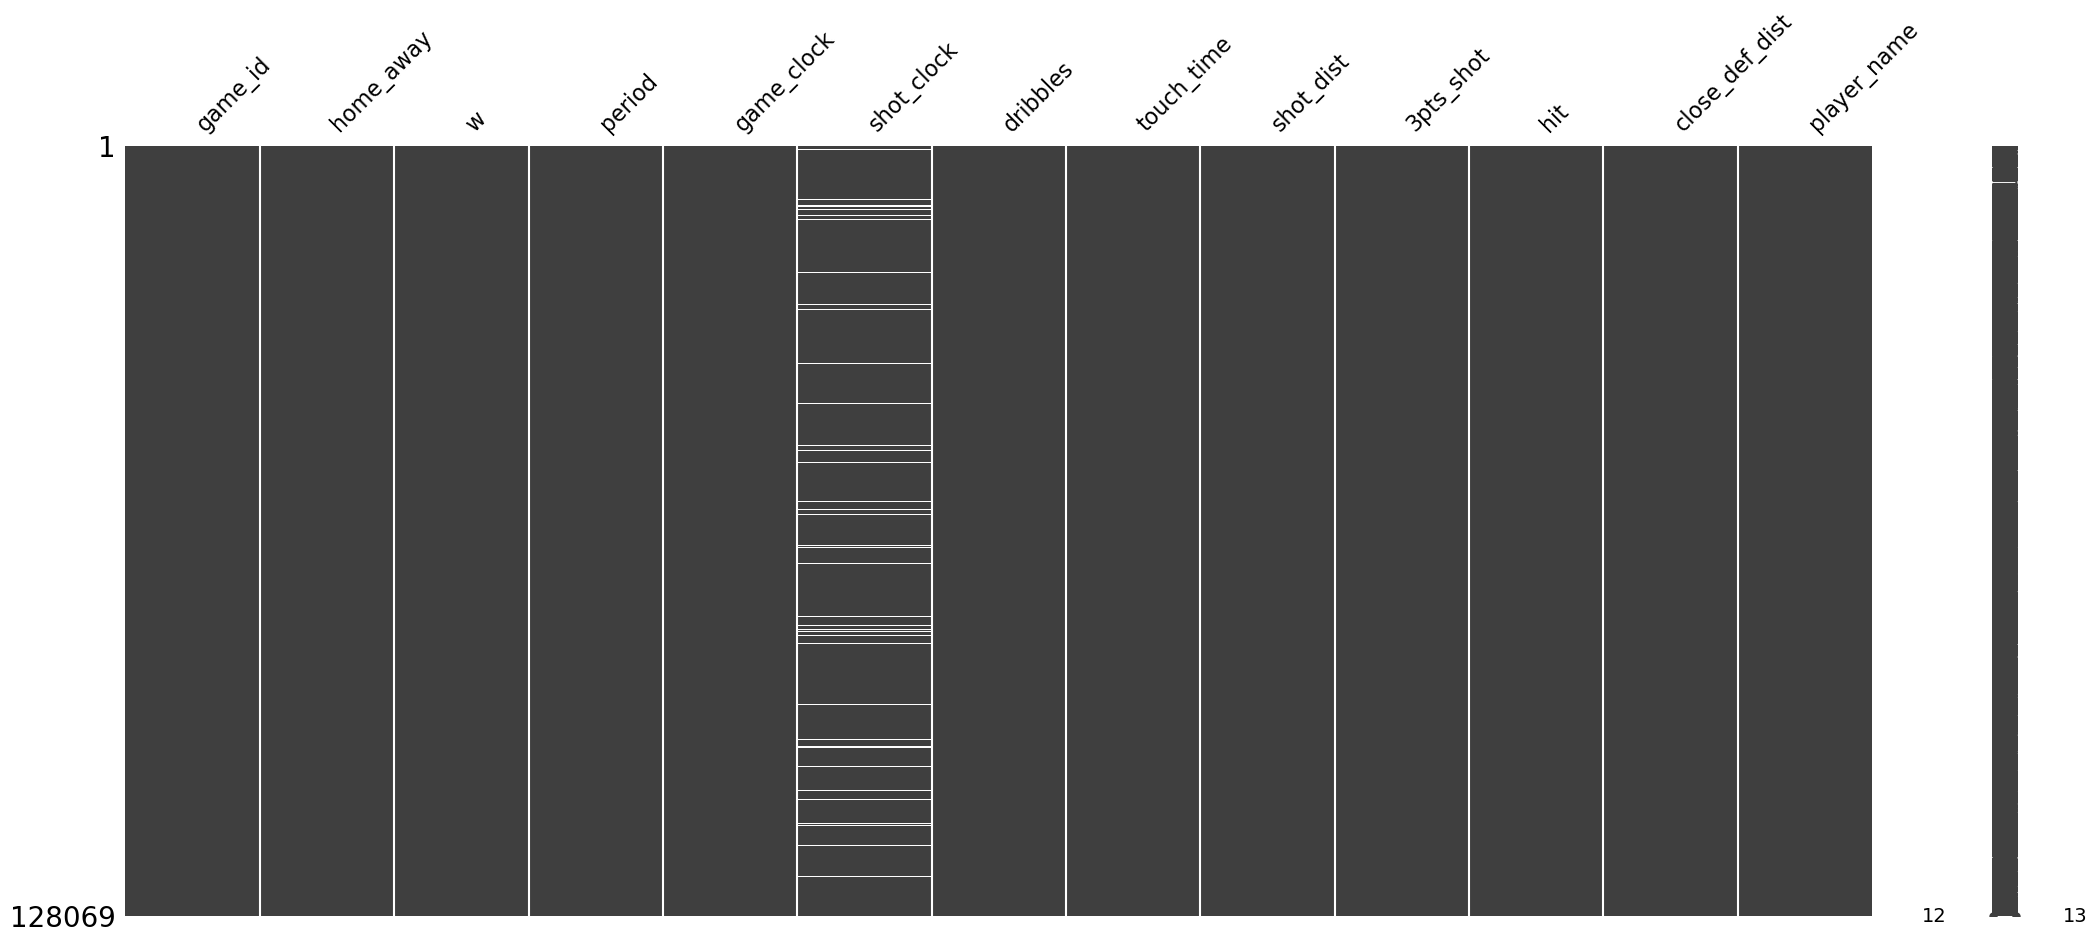

In [23]:
msno.matrix(new_df);

In [24]:
# filling the nan values in shot_clock column with shot clock column's mean
new_df.shot_clock = new_df.shot_clock.fillna(new_df.shot_clock.mean())

In [25]:
new_df.isnull().sum()

game_id           0
home_away         0
w                 0
period            0
game_clock        0
shot_clock        0
dribbles          0
touch_time        0
shot_dist         0
3pts_shot         0
hit               0
close_def_dist    0
player_name       0
dtype: int64

In [26]:
# converting the game_clock values to the seconds
new_df.game_clock = new_df.game_clock.apply(lambda x: int(x.split(":")[0])*60 + int(x.split(":")[1]))

In [27]:
new_df.head()

,game_id,home_away,w,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,3pts_shot,hit,close_def_dist,player_name
0,21400899,0,1,1,69,10.800000,2,1.9,7.7,0,1,1.3,brian roberts
1,21400899,0,1,1,14,3.400000,0,0.8,28.2,1,0,6.1,brian roberts
2,21400899,0,1,1,0,12.453344,3,2.7,10.1,0,0,0.9,brian roberts
3,21400899,0,1,2,707,10.300000,2,1.9,17.2,0,0,3.4,brian roberts
4,21400899,0,1,2,634,10.900000,2,2.7,3.7,0,0,1.1,brian roberts


In [28]:
shot_perc_by_player = new_df.groupby("player_name", as_index=False)[["hit"]].mean().sort_values(by="hit", ascending=False)
shot_perc_by_player.hit = shot_perc_by_player.hit.apply(lambda x: round(x*100, 2))
# the players that is top 10 highest shot percentages 
shot_perc_by_player.head(10)

,player_name,hit
66,deandre jordan,71.25
270,tyson chandler,67.65
235,rudy gobert,62.55
98,greg smith,61.70
109,james johnson,61.41
82,ed davis,60.29
8,alexis ajinca,59.72
188,mason plumlee,58.56
132,john henson,58.09
45,chris andersen,58.09


In [29]:
def perc_log(name,size):
    perc = new_df[new_df.player_name==name].groupby("game_id")["hit"].mean().values
    percents = perc[:(len(perc)//size)*size].reshape(-1, size)
    return sns.distplot(percents)

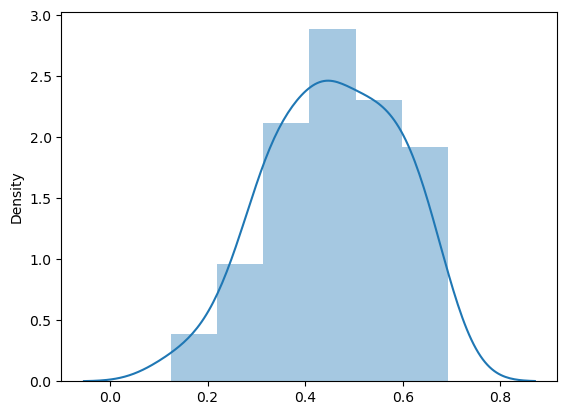

In [30]:
# shot percentage distribution per each 5 games for james harden
perc_log("james harden", 5);

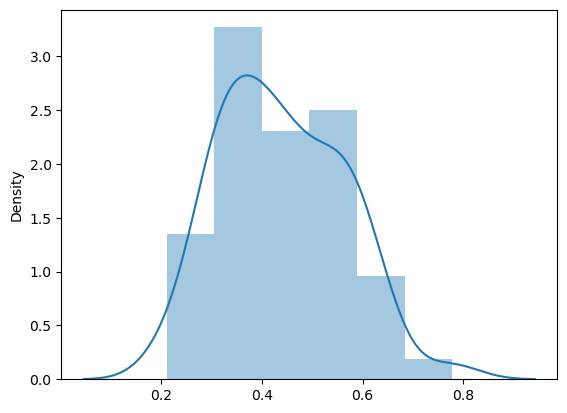

In [31]:
# shot percentage distribution per each 5 games for damian lillard
perc_log("damian lillard", 5);

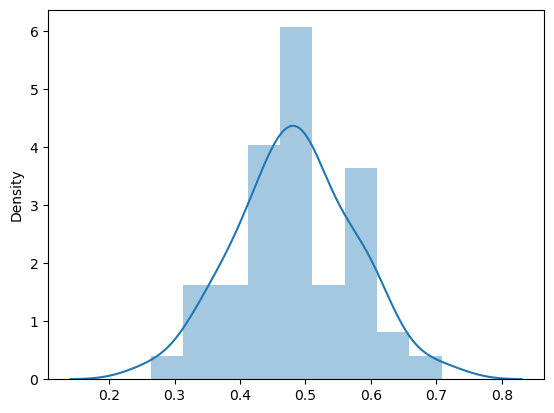

In [32]:
# shot percentage distribution per each 5 games for lebron james
perc_log("lebron james", 5);

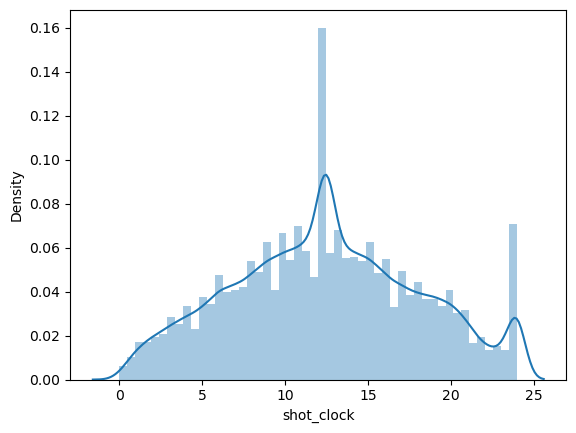

In [33]:
# shot distribution according to shot_clock
sns.distplot(new_df.shot_clock);

In [34]:
hit_clock = new_df.groupby("shot_clock", as_index=False)[["hit"]].mean()

In [35]:
# shot_clock that has max hit rate 
hit_clock[hit_clock.hit==hit_clock.hit.max()]

,shot_clock,hit
217,21.6,0.644144


In [36]:
# shot_clock that has min hit rate 
hit_clock[hit_clock.hit==hit_clock.hit.min()]

,shot_clock,hit
3,0.3,0.183099


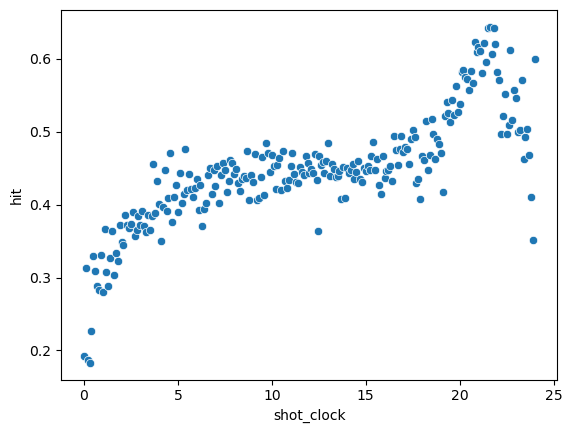

In [37]:
# shot clock that has maximum shot rate 
sns.scatterplot(x="shot_clock", y="hit", data=hit_clock);

In [38]:
new_df.head()

,game_id,home_away,w,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,3pts_shot,hit,close_def_dist,player_name
0,21400899,0,1,1,69,10.800000,2,1.9,7.7,0,1,1.3,brian roberts
1,21400899,0,1,1,14,3.400000,0,0.8,28.2,1,0,6.1,brian roberts
2,21400899,0,1,1,0,12.453344,3,2.7,10.1,0,0,0.9,brian roberts
3,21400899,0,1,2,707,10.300000,2,1.9,17.2,0,0,3.4,brian roberts
4,21400899,0,1,2,634,10.900000,2,2.7,3.7,0,0,1.1,brian roberts


In [39]:
# shot clock average of the missed shots
round(new_df[new_df.hit==0].shot_clock.mean(),2)

11.97

In [40]:
# shot clock average of the accurate shots
round(new_df[new_df.hit==1].shot_clock.mean(),2)

13.04

In [41]:
# 3 pointers hit rate
new_df[new_df["3pts_shot"]==1].hit.mean()

0.3515164031154118

In [42]:
# 2 pointers hit rate
new_df[new_df["3pts_shot"]==0].hit.mean()

0.48835653531266926

In [43]:
# the average distance of the defensive player in successful 3-point shots
new_df[(new_df["3pts_shot"]==1)&(new_df["hit"]==1)].close_def_dist.mean()

6.2862106588333715

In [44]:
# the average distance of the defensive player in missed 3-point shots
new_df[(new_df["3pts_shot"]==1)&(new_df["hit"]==0)].close_def_dist.mean()

5.88501433055822